# Digit_recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

from keras.callbacks import EarlyStopping, ModelCheckpoint 
from tensorflow.keras.models import load_model

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print('train set shape:',train.shape)
print('test set shape:',test.shape)

train set shape: (42000, 785)
test set shape: (28000, 784)


In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
max_scale = train.to_numpy().max()
max_scale

255

In [5]:
X = np.array(train.drop('label',axis=1)) / max_scale
y = np.array(train['label'])

X_test = np.array(test) / max_scale

print('X shape', X.shape)
print('y shape', y.shape)
print('X_test shape', X_test.shape)

X shape (42000, 784)
y shape (42000,)
X_test shape (28000, 784)


In [6]:
print('image size:',X.shape[1]**0.5)

image size: 28.0


In [7]:
image = X.reshape(X.shape[0],28,28)

In [8]:
image.shape

(42000, 28, 28)

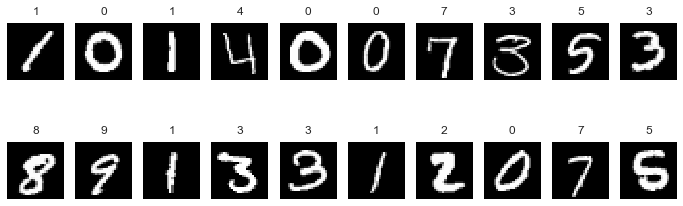

In [9]:
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(12, 4))
plt.gray() 
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.matshow(image[idx]) 
    ax.set_title(y[idx])
    ax.axis('off')

In [10]:
# Generate train/test and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.02, random_state=42)

# One-Hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)

# Size of sets
print("Train X:",X_train.shape)
print("Train y:",y_train.shape)
print("Valid X:",X_valid.shape)
print("Valid y:",y_valid.shape)

Train X: (41160, 784)
Train y: (41160, 10)
Valid X: (840, 784)
Valid y: (840, 10)


In [11]:
# Building the model
model = Sequential()
model.add(Dense(800, activation='relu', input_dim = X_train.shape[1]))
model.add(Dropout(.2))
model.add(Dense(800, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               628000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 800)               640800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 1,276,810
Trainable params: 1,276,810
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# train the model
checkpointer = ModelCheckpoint(filepath='model.nn.best.h5', verbose=0, save_best_only=True)

history = model.fit(
    X_train, 
    y_train, 
    validation_split=0.33, 
    epochs=20, 
    callbacks=[checkpointer],
    batch_size=32, 
    verbose=1
)


Train on 27577 samples, validate on 13583 samples
Epoch 1/20
27577/27577 [==============================] - 85s 3ms/step - loss: 0.2711 - accuracy: 0.9165 - val_loss: 0.1335 - val_accuracy: 0.9593
Epoch 2/20
27577/27577 [==============================] - 92s 3ms/step - loss: 0.1213 - accuracy: 0.9616 - val_loss: 0.1190 - val_accuracy: 0.9650
Epoch 3/20
27577/27577 [==============================] - 77s 3ms/step - loss: 0.0847 - accuracy: 0.9713 - val_loss: 0.1123 - val_accuracy: 0.9685
Epoch 4/20
27577/27577 [==============================] - 81s 3ms/step - loss: 0.0757 - accuracy: 0.9753 - val_loss: 0.1106 - val_accuracy: 0.9683
Epoch 5/20
27577/27577 [==============================] - 76s 3ms/step - loss: 0.0585 - accuracy: 0.9811 - val_loss: 0.1336 - val_accuracy: 0.9656
Epoch 6/20
27577/27577 [==============================] - 77s 3ms/step - loss: 0.0576 - accuracy: 0.9819 - val_loss: 0.0996 - val_accuracy: 0.9738
Epoch 7/20
27577/27577 [==============================] - 89s 3ms/s

In [14]:
# evaluate test accuracy
score = model.evaluate(X_valid, y_valid, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.5000%


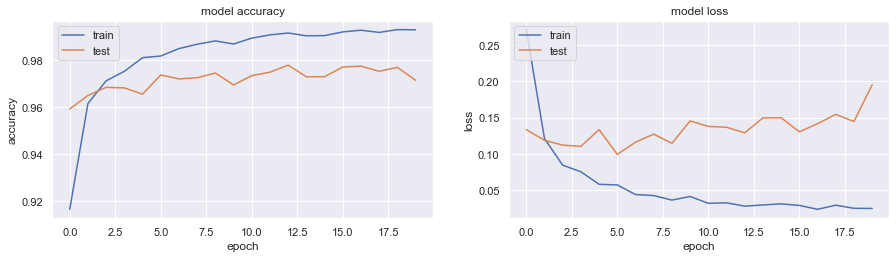

In [15]:
plt.figure(1, figsize = (15,8)) 

# summarize history for accuracy
plt.subplot(221) 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(222) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [16]:
y_pred = model.predict_classes(X_test)

In [17]:
image_test = X_test.reshape(X_test.shape[0],28,28)

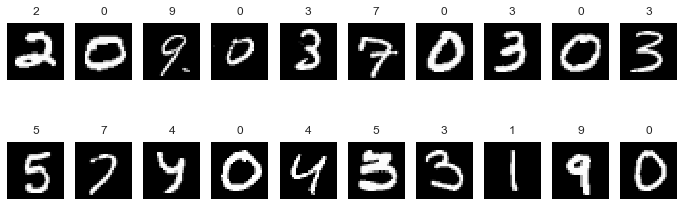

In [18]:
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(12, 4))
plt.gray() 
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.matshow(image_test[idx]) 
    ax.set_title(y_pred[idx])
    ax.axis('off')

In [19]:
# Submit predictions

submission = pd.DataFrame({
    'ImageId': np.array(test.reset_index()['index'])+1,
    'Label': y_pred
})
submission.to_csv('submission.csv', index=False)